In [73]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, roc_curve, precision_score, roc_auc_score

# Helper function for hyper-parameter turning.

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

In [74]:
tree?

Type:        module
String form: <module 'sklearn.tree' from 'c:\\Users\\Andy\\miniconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'>
File:        c:\users\andy\miniconda3\lib\site-packages\sklearn\tree\__init__.py
Docstring:  
The :mod:`sklearn.tree` module includes decision tree-based models for
classification and regression.

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [75]:
# Load in the titanic data set.
titanic = sns.load_dataset('titanic')
sns.set()

<Figure size 1000x1000 with 0 Axes>

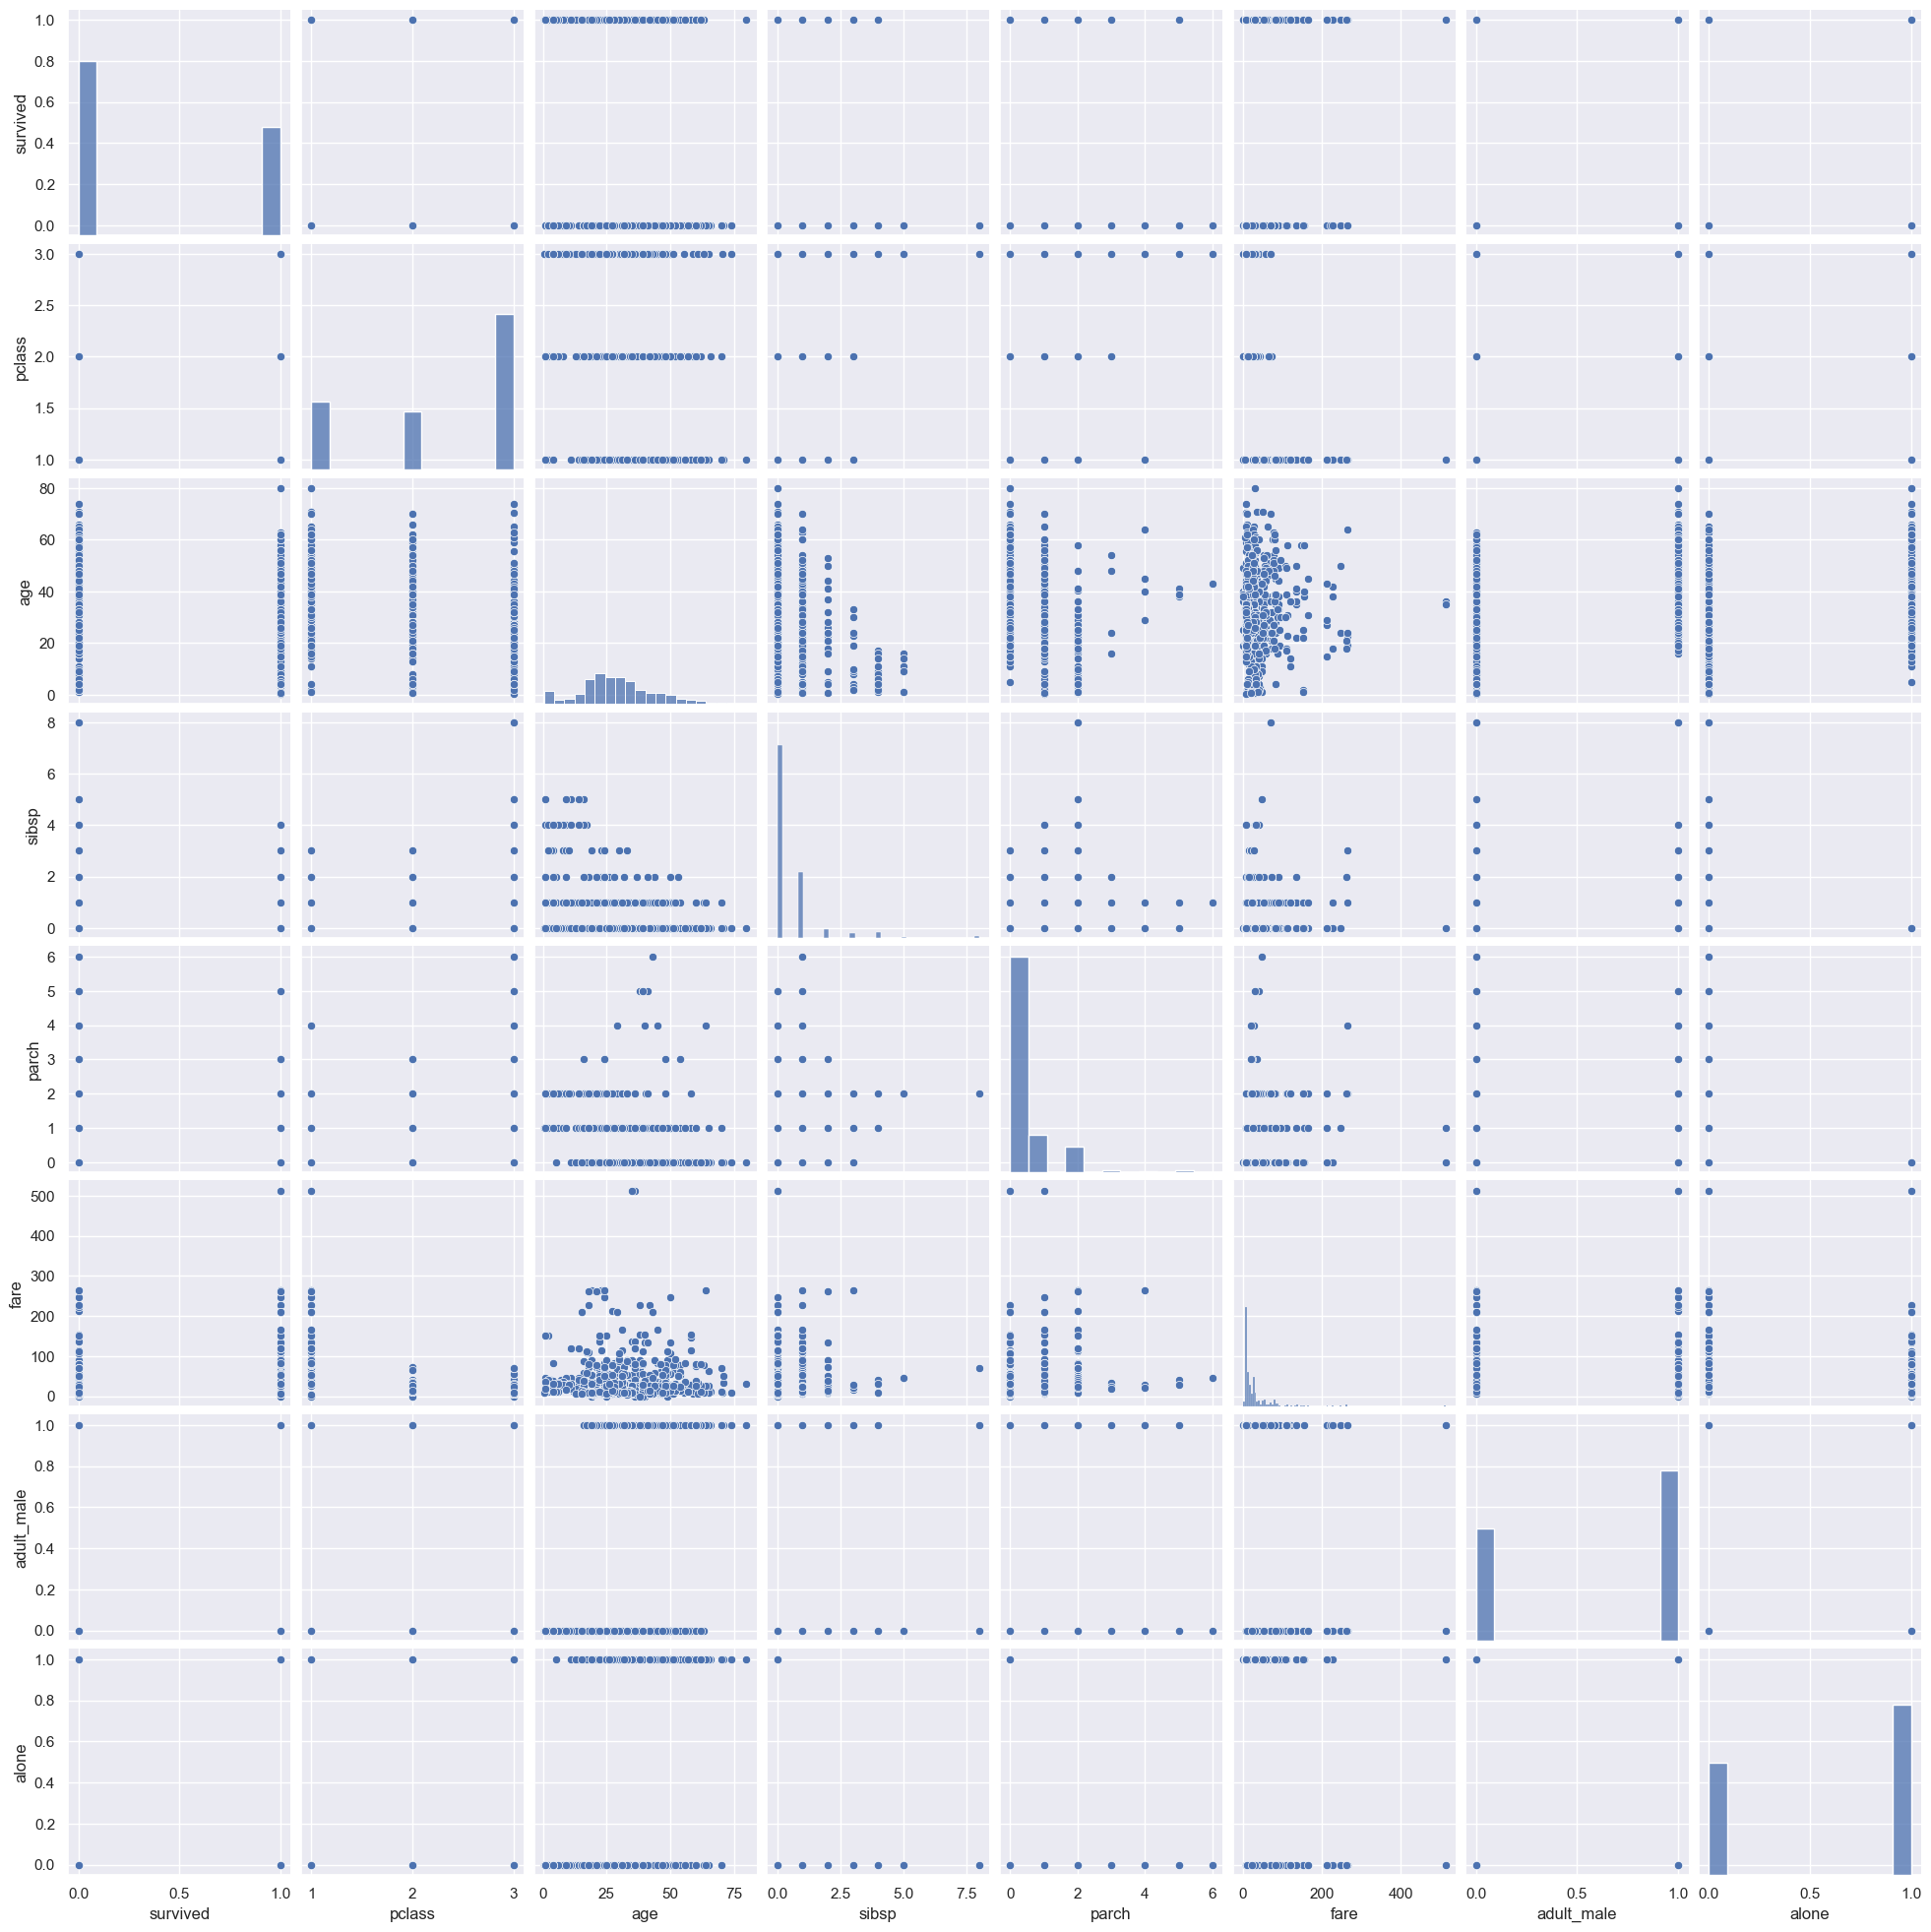

In [76]:
# Visualize all the data using sns.pairplot
plt.figure(figsize=(10,10))
sns.pairplot(data=titanic)

In [77]:
# Check for null values
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [78]:
# Fill age null values with -999
titanic['age'].fillna(-999,inplace=True)


In [79]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
titanic = pd.get_dummies(titanic,columns=['sex','class','who','embarked','embark_town','alive'])
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,deck,alone,sex_female,...,who_man,who_woman,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,NaN,False,False,...,True,False,False,False,True,False,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,C,False,True,...,False,True,True,False,False,True,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,NaN,True,True,...,False,True,False,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,C,False,True,...,False,True,False,False,True,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,True,NaN,True,False,...,True,False,False,False,True,False,False,True,True,False


In [80]:
# 2. Create a list of the features we are going to use.
selected_features = ['pclass','age','fare','adult_male','alone','sex_female']


In [81]:
# Define our `X` and `y`
X = titanic[selected_features]
y=titanic['survived']


In [82]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=69)
print('Length of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Length of our Training data: (623, 6) 
Length of our Testing data: (268, 6)


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [83]:
# For our first pass, initialize our model with `max_depth=2`.

model = RandomForestClassifier(max_depth= 2)

In [84]:
# Fit our model with our training data. 
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=2)

In [85]:
# Make predictions of our testing data. 
y_pred = model.predict(X_test)

In [86]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_test,y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.813433
Precision Score: 0.784091
Recall Score: 0.690000
F1 Score: 0.734043
AUC Score: 0.854762


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [87]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    'criterion':['gini','entropy','log_loss'], 
    'max_depth':[3,5,10],
    'splitter':['best','random']}

In [88]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV(DecisionTreeClassifier(),params)

In [89]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10],
                         'splitter': ['best', 'random']})

In [90]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}


In [94]:
y_pred.shape

(623,)

In [95]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5,
                               splitter='random')

model.fit(X_train,y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test,y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.832090
Precision Score: 0.876712
Recall Score: 0.640000
F1 Score: 0.739884
AUC Score: 0.892738


In [96]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
3,0.532649,adult_male
0,0.276266,pclass
2,0.126308,fare
1,0.055815,age
4,0.005732,alone
5,0.003230,sex_female


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [100]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'n_estimators':[100,500,1000],
    'criterion':['gini','entropy','log_loss'], 
    'max_depth':[3,5,10]
}

In [101]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
model = GridSearchCV(RandomForestClassifier(),params)


In [102]:
# 1. Fit your GridSearchCV with your training data. 
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [103]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(model.best_params_)




{'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 500}


In [104]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test,y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test,y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.839552
Precision Score: 0.820225
Recall Score: 0.730000
F1 Score: 0.772487
AUC Score: 0.870357


In [105]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

adult_male    0.626593
pclass        0.207012
fare          0.161603
age           0.004791
alone         0.000000
sex_female    0.000000
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [106]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [109]:
df.drop_duplicates()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
482,1,0.0,1.0,539000,2000,709,760,5
485,1,4.0,4.0,3760000,1894,3085,1219,49
487,1,5.0,2.5,1800000,1890,3073,586,76
488,1,2.0,1.0,695000,1923,1045,665,106


In [111]:
y=df['in_sf']
X=df.drop(columns=['in_sf'])

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)

In [122]:
params = {
    'n_estimators':[200,500,1000],
    'criterion':['gini','entropy','log_loss'], 
    'max_depth':[3,5,10]
}

In [123]:
model = GridSearchCV(RandomForestClassifier(),params)

In [124]:
model.fit(X_train,y_train)
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1000}


In [125]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 
model = RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 1000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [126]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test,y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test,y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.905405
Precision Score: 0.938462
Recall Score: 0.859155
F1 Score: 0.897059
AUC Score: 0.969087


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()